<a href="https://colab.research.google.com/github/noeyxos/MS-AI-SCHOOL/blob/main/DL_Keras_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import keras
keras.__version__

'2.12.0'

In [29]:
from keras.datasets import mnist    #mnist: 손글씨 데이터
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

In [30]:
train_images.shape    #train용 데이터 6만건 (28*28 사이즈 손글씨)

(60000, 28, 28)

In [31]:
test_images.shape  #test용 데이터 1만건 (28*28 사이즈 손글씨)

(10000, 28, 28)

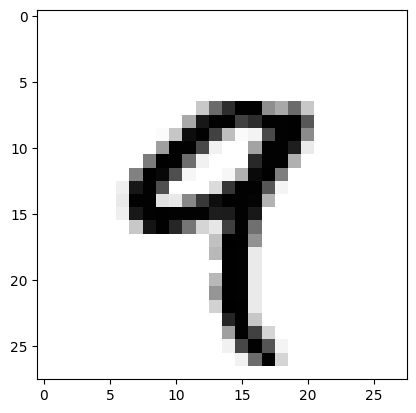

In [32]:
# 데이터의 확인
import matplotlib.pyplot as plt

digit = train_images[4]   #5번째 이미지 가져오기
plt.imshow(digit, cmap=plt.cm.binary) #이미지 출력

In [33]:
# 신경망을 만드는 부분

from keras import models
from keras import layers

network  = models.Sequential()    # 신경망을 Sequential(): 순차적으로 쌓는다
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) # 512개 layer, 28*28짜리 데이터, input모양은 처음에만 정해주면 자동으로 나머지는 넘어간다.
network.add(layers.Dense(10, activation='softmax'))   #10개 layer, 0~9사이의 값을 예측할 수 있도록 softmax를 사용한다!

#오류 잡기
network.compile(optimizer='rmsprop',  # 가장 많이 쓰이는 optimizer : rmsprop
                loss ='categorical_crossentropy', # 손실함수 지정
                metrics=['accuracy'])  # loss function에서 기준으로 삼을 metrics 지정

In [34]:
# 데이터를 준비하는 부분 
# train image 준비
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') /255    # 0~255 인 정수 타입을 실수형으로 변환 후 255로 나누기 !
train_images[0]   # 0~1사이의 값이 되었다.

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
# test image 준비
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [36]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [37]:
# 라벨 데이터를 카테고리 데이터로 변환
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [38]:
#train_labels[0:3]     # 데이터 엔코딩 !

In [39]:
# 신경망의 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)  #epochs=5: 전체 학습을 5번 한다, batch_size=128

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2656 - accuracy: 0.9223
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1070 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0704 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0509 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0389 - accuracy: 0.9880


In [40]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0600 - accuracy: 0.9808
test acc: 0.9807999730110168


In [41]:
# IMDB

from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)  #dataset에서 츨연빈도가 높은 10000개만 가져오기

17464789/17464789 [==============================] - 0s 0us/step


In [42]:
train_data.shape

(25000,)

In [43]:
train_data[0]   # 단어를 숫자로 표현한 것

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [44]:
train_labels[0:5]   #  긍정 1 , 부정 0

array([1, 0, 0, 1, 0])

In [50]:
max ([max(sequence) for sequence in train_data])  # for 문을 돌려 뽑은 sequence의 max값 중에서 max를 출력해보기

9999

In [60]:
# 데이터를 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))

  print(result.shape)

  for i, sequence in enumerate(sequences):
    result[i , sequence] = 1
  return result

In [65]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [62]:
x_train[0]    # float 타입

array([0., 1., 1., ..., 0., 0., 0.])

In [52]:
a = [1,2,3,4]
for i , item in enumerate(a):   # 열거형으로 바꾸는 함수 enumerate() 
  print(i, item)  # index 값, item 열거 

0 1
1 2
2 3
3 4


In [63]:
# 라벨 데이터도 실수형으로 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [64]:
y_train[0]

1.0

In [80]:
#  신경망 제작
from keras import models
from keras import layers

model =  models.Sequential()  #순차적으로 만든다
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ))) #입력층
model.add(layers.Dense(16, activation='relu')) #은닉층
model.add(layers.Dense(1, activation='sigmoid')) #출력층

model.compile(optimizer ='rmsprop', loss ='binary_crossentropy', metrics=['accuracy']) # 손실함수

In [81]:
x_val = x_train[:10000] # 검증용 데이터는 따로 떼놓기
partial_x_train = x_train[10000:]
y_val =y_train[:10000]
partial_y_train = y_train[10000:]

In [82]:
history = model.fit(partial_x_train,
                    partial_y_train,  
                    epochs=4, #가장 잘 나온 회차에서 멈춘다
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/4
30/30 [==============================] - 3s 88ms/step - loss: 0.5197 - accuracy: 0.7769 - val_loss: 0.3937 - val_accuracy: 0.8637
Epoch 2/4
30/30 [==============================] - 2s 66ms/step - loss: 0.3224 - accuracy: 0.8925 - val_loss: 0.3283 - val_accuracy: 0.8726
Epoch 3/4
30/30 [==============================] - 1s 45ms/step - loss: 0.2413 - accuracy: 0.9185 - val_loss: 0.2821 - val_accuracy: 0.8897
Epoch 4/4
30/30 [==============================] - 1s 37ms/step - loss: 0.1964 - accuracy: 0.9340 - val_loss: 0.2744 - val_accuracy: 0.8890


In [70]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

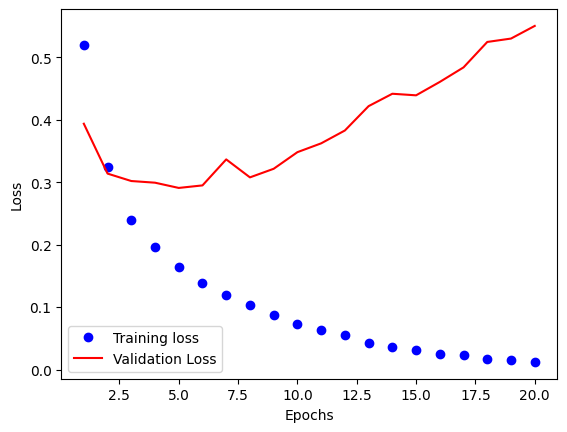

In [78]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss =history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

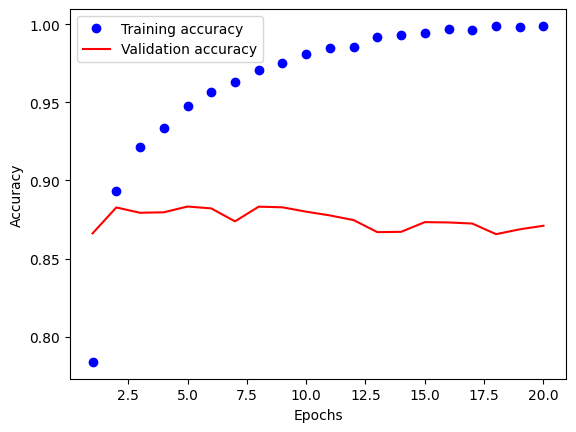

In [79]:
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [83]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.24561068],
       [0.99777156],
       [0.87465215],
       ...,
       [0.0920451 ],
       [0.11528132],
       [0.5685654 ]], dtype=float32)

In [84]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss={0}, accuracy={1}'.format(test_loss, test_acc))

782/782 [==============================] - 2s 3ms/step - loss: 0.2886 - accuracy: 0.8826
loss=0.28857362270355225, accuracy=0.88264000415802
